In [74]:
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import os

os.getcwd() 
os.chdir("/Users/macbook/Downloads/lending-club")
accepted = pd.read_csv("accepted_2007_to_2016.csv")
#rejected = pd.read_csv("rejected_2007_to_2016.csv")

#print(accepted.sample(5))
#print(accepted.shape)
print(accepted.columns[0:30])
print(accepted.columns[31:60])
print(accepted.columns[61:90])
print(accepted.columns[91:])

# print(rejected.sample(15))
# print(rejected.shape)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc'],
      dtype='object')
Index(['revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',

In [75]:
print(accepted.isnull().sum())
#print("="*20)
#rejected.isnull().sum()

id                                      0
member_id                               0
loan_amnt                               0
funded_amnt                             0
funded_amnt_inv                         0
term                                    0
int_rate                                0
installment                             0
grade                                   0
sub_grade                               0
emp_title                           79966
emp_length                          73049
home_ownership                          0
annual_inc                              4
verification_status                     0
issue_d                                 0
loan_status                             0
pymnt_plan                              0
desc                              1195780
purpose                                 0
title                               23325
zip_code                                0
addr_state                              0
dti                               

For borrowers, the most important factor is interest rate charged. Provide insights on the interest rates 
dependence on loan grade/subgrade and term (36 or 60 months).


In [76]:
accepted['issue_d']= pd.to_datetime(accepted['issue_d'])
accepted['issue_month'] = accepted['issue_d'].dt.month
accepted['issue_year'] = accepted['issue_d'].dt.year

sub = accepted[['int_rate', 'grade','sub_grade','term', 'issue_d', 'loan_status','issue_month','issue_year']]
sub.sample(15)

,int_rate,grade,sub_grade,term,issue_d,loan_status,issue_month,issue_year
504404,12.69,C,C2,36 months,2015-05-01,Current,5,2015
791302,13.98,C,C3,36 months,2014-06-01,Charged Off,6,2014
993317,9.80,B,B3,60 months,2016-01-01,Current,1,2016
1171874,19.99,D,D4,36 months,2016-08-01,Current,8,2016
563223,14.65,C,C5,60 months,2015-04-01,Current,4,2015
343111,21.99,F,F1,60 months,2015-10-01,Charged Off,10,2015
230908,5.32,A,A1,36 months,2015-12-01,Current,12,2015
471268,12.69,C,C2,60 months,2015-07-01,Current,7,2015
190818,11.14,B,B2,36 months,2012-11-01,Fully Paid,11,2012
543205,8.18,B,B1,36 months,2015-04-01,Current,4,2015


['A', 'B', 'C', 'D', 'E', 'F', 'G']


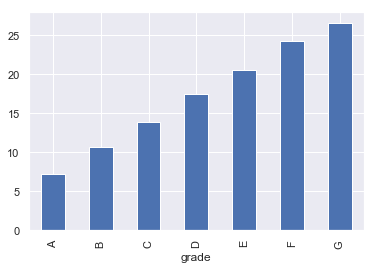

In [77]:
grades = sorted(list(sub.grade.unique()))
print(grades)

for grade in grades:
    sub_grade_a = accepted.groupby(['grade'])["int_rate"].mean()
    sub_grade_a.plot.bar()


['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


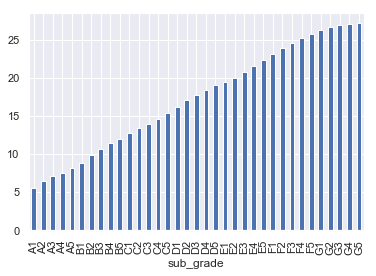

In [78]:
sub_grades = sorted(list(sub.sub_grade.unique()))
print(sub_grades)

for sub_grade in sub_grades:
    sub_grade_b = accepted.groupby(['sub_grade'])["int_rate"].mean()
    sub_grade_b.plot.bar()

# sort_by_sub_grade = sub.sort_values('sub_grade')
# sns.set(style="whitegrid")
# ax2 = sns.barplot(x="sub_grade", y="int_rate", data=sort_by_sub_grade)

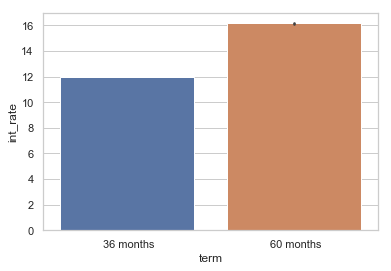

In [79]:
sort_by_term = sub.sort_values('term')
sns.set(style="whitegrid")
ax3 = sns.barplot(x="term", y="int_rate", data=sort_by_term)

In [84]:
by_year = pd.DataFrame(accepted.groupby(['issue_d','grade'])['int_rate'].mean())
by_year.T

# accepted['issue_d']= pd.to_datetime(accepted['issue_d'])
# accepted['issue_month'] = accepted['issue_d'].dt.month
# accepted['issue_year'] = accepted['issue_d'].dt.year

issue_d  2007-06-01                                 2007-07-01            \
grade             A      B          C      D      E          A         B   
int_rate   7.748571  9.445  10.906667  12.49  13.91   7.706667  9.363333   

issue_d                               ... 2016-11-01                       \
grade         C          D         E  ...          E          F         G   
int_rate  10.74  12.734444  14.46125  ...  24.369287  29.654418  30.84418   

issue_d  2016-12-01                                                        \
grade             A          B          C          D          E         F   
int_rate   6.989917  10.575706  14.149489  18.842871  24.342873  29.68329   

issue_d              
grade             G  
int_rate  30.868226  

[1 rows x 802 columns]

In [85]:
by_year_sub = pd.DataFrame(accepted.groupby(['issue_d','sub_grade'])['int_rate'].mean())
by_year_sub.T

issue_d   2007-06-01                                                          \
sub_grade         A1    A2    A3    A5    B2    B3    B4    B5     C1     C2   
int_rate        7.12  7.43  7.75  8.38  9.01  9.33  9.64  9.96  10.28  10.59   

issue_d    ... 2016-12-01                                                   \
sub_grade  ...         F1     F2     F3     F4     F5     G1     G2     G3   
int_rate   ...      28.69  29.49  29.99  30.49  30.74  30.79  30.84  30.89   

issue_d                  
sub_grade     G4     G5  
int_rate   30.94  30.99  

[1 rows x 3838 columns]

If the analysis is refined by separating loans with different start months (the year-month loan issuance date), 
report your finding.


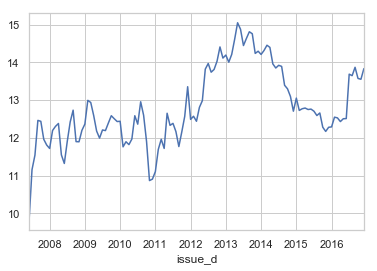

In [46]:
accepted.groupby(['issue_d'])['int_rate'].mean().plot()

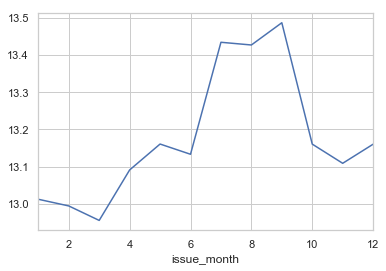

In [89]:
accepted.groupby(['issue_month'])['int_rate'].mean().plot()

In [103]:
by_month = pd.DataFrame(accepted.groupby(['issue_month','grade'])['int_rate'].mean())
by_month.T

issue_month        1                                                        \
grade               A          B         C          D         E          F   
int_rate     7.243729  10.729758  13.91215  17.038464  20.07244  23.668186   

issue_month                   2                         ...         11  \
grade                G         A          B          C  ...          E   
int_rate     26.108357  7.168965  10.595317  13.912684  ...  20.795495   

issue_month                              12                                   \
grade                F          G         A          B          C          D   
int_rate     24.583133  26.849468  7.123205  10.603009  13.891447  17.701071   

issue_month                                   
grade                E          F          G  
int_rate     20.971845  25.001992  27.545872  

[1 rows x 84 columns]

In [104]:
by_month_sub = pd.DataFrame(accepted.groupby(['issue_month','sub_grade'])['int_rate'].mean())
by_month_sub.T

issue_month        1                                                    \
sub_grade          A1       A2        A3        A4        A5        B1   
int_rate     5.641989  6.50864  7.144929  7.602571  8.266818  8.920095   

issue_month                                             ...         12  \
sub_grade          B2         B3         B4         B5  ...         F1   
int_rate     9.838695  10.735311  11.647993  12.175071  ...  23.872958   

issue_month                                                                   \
sub_grade           F2         F3        F4         F5         G1         G2   
int_rate     24.781421  25.167146  26.03513  26.836156  27.189946  27.546584   

issue_month                                
sub_grade          G3       G4         G5  
int_rate     27.87156  27.7144  27.812424  

[1 rows x 420 columns]

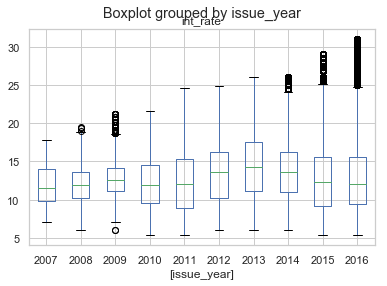

In [48]:
accepted[['issue_year', 'int_rate']].boxplot(by='issue_year')

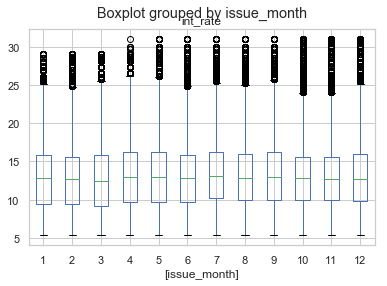

In [50]:
accepted[['issue_month', 'int_rate']].boxplot(by='issue_month')

Any rational explanation on why the interest rate should be grade/sub-grade dependent?


- The interest rates take into account of credit risk and market conditions and the final interet rate for each 
loan grade is calculated by the following equation: Lending Club Base Rate + Adjustment for Risk & Volatility

- Where the "Adjustment for Risk & Volatility" is designed to cover expected losses and provide higher risk-adjusted returns for each loan grade increment from A1 to G5.

- The loan grade is the result of a formula that takes into account not only credit score, but also a combination of several indicators of credit risk from the credit report and loan application 

Any rational explanation on the time series variations of interest rates?


- Financial indesutry faces seasonality, where the basic seasonal pattern of the banking industry follows
    - a period of annual lows in late January and February, 
    - a surge in loans that begins in March
    - rises sharply through May, usually peaking in early June
        - From there, demand for banking services typically remains relatively flat to slightly down through 
        the summer months, extends to around the first of October
    - Then, a steady increase in business from the first part of October through the first part of January

- Interest rates tend to be lower in spring and fall, and higher in winter and summer, and corporations obviously try to obtain major financing when rates are lowest. Spring is historically the prime home buying season. This leads to a sharp increase in applications for home mortgages during March, April and May.

- A third factor that drives the seasonal pattern for the banking industry is the increased demand for investment services that occurs in December and the first part of January. This is the time of year when portfolio and fund managers do a lot of rebalancing and when individuals make significant investment adjustments, such as end-of-the-year or first-of-the-year moves designed to gain tax advantages.

- Tax planning is also a factor in the demand for bank services and can be a factor contributing to the seasonal  rise in activity that begins in March, just prior to the April 15th income tax deadline.

Any rational explanation why the interest rate rise w.r.t. loan term?


- With a longer duration (loan term) comes a higher risk that the loan will not be repaid, which generally 
explains why long-term rates are higher than short-term ones, in addition to the overall capacity for 
customers to take on debt

For investors, it is crucial to know whether a loan is served to completion (loan_status 'Fully Paid').
Please analyze the percentages of non-completed loans in each loan grade/subgrade (i.e. default, charged off) which go beyond delinquency.

In [147]:
grades = sorted(list(sub.grade.unique()))

for grade in grades:
    sub_grade = sub[sub['grade']== grade]
    total_grade = sub_grade.shape[0]
    sub_grade_paid = sub_grade[sub_grade['loan_status']=='Fully Paid'].shape[0] #74777
    print(grade,sub_grade_paid/total_grade*100, '%')

A 34.13633168077278 %
B 32.440851785691336 %
C 27.47163802475275 %
D 28.339170339955317 %
E 25.551733427274797 %
F 25.862335175863876 %
G 24.83830845771144 %


In [110]:
sub_grades = sorted(list(sub.sub_grade.unique()))

for sub_grade in sub_grades:
    sub_grade_s = sub[sub['sub_grade']== sub_grade]
    total_grade_s = sub_grade_s.shape[0]
    sub_grade_s_paid = sub_grade_s[sub_grade_s['loan_status']=='Fully Paid'].shape[0] #74777
    print(sub_grade, sub_grade_s_paid/total_grade_s*100, '%')

A1 27.975118284218365 %
A2 34.11970029789667 %
A3 36.93723299375616 %
A4 37.10567983435508 %
A5 34.413904213250014 %
B1 31.199147477714895 %
B2 34.35117660844511 %
B3 35.209486166007906 %
B4 32.4732528754635 %
B5 28.914415425677863 %
C1 28.526874507173204 %
C2 28.679427172520516 %
C3 27.34405025378692 %
C4 25.899810002943617 %
C5 26.569671235442883 %
D1 28.337710339461143 %
D2 28.411638175025473 %
D3 29.16711244249492 %
D4 27.945472249269717 %
D5 27.671058366019647 %
E1 25.169962316926302 %
E2 26.77622917328733 %
E3 24.849047840222944 %
E4 25.368584758942458 %
E5 25.507747856175715 %
F1 26.892924481492507 %
F2 25.309944605644947 %
F3 26.551273677335075 %
F4 25.11453561016243 %
F5 24.065297525013165 %
G1 26.52058934642992 %
G2 25.198019801980198 %
G3 22.92950034223135 %
G4 25.145631067961165 %
G5 21.768707482993197 %


- Provide justification the introduction of loan grade/subgrade.
- Provide justification on the rate hike on riskier loan grade/subgrade.

- Loan grading is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, quality of collateral and likelihood of repayment of the principal and interest. A score can also be applied to a portfolio of loans

- Banks often develop their own rating scales comprising as many as 12 categories ranging from "prime," indicating little to no risk, to "substandard" or "doubtful," indicating a high probability that the loan will be uncollectible—and "loss," indicating little or no recovery is likely.

- Bank examiners use a classification system when conducting a bank examination and will assign their own scores to a sample of the bank's loan portfolio. In assigning a score to a loan, the examiner will review the loan documentation, collateral and the borrower's financial statements.

- Banks may develop their own loan grading scales with as many as a dozen categories ranging from "prime," for which there is little or no risk, to "loss," which indicates that little or no recovery is likely. A standardized loan classification system published by three Federal supervisory agencies in 1949 included three primary categories for loans considered weak:

- Substandard loans were those carrying higher-than-normal risk due to the financial health or unfavorable history of the borrower, inadequate collateral, or other factors. Doubtful loans were those for which collection was doubtful, but the loss was not determined. Loss referred to loans considered uncollectible.


?? What happens to percentage rates of loans involving settlement? Make sure that your analysis takes into account of loan-term.

In [102]:
print(accepted.describe())
#print(rejected.describe())
#print(accepted.column_name.value_counts())
#rejected.column_name.value_counts()

                 id     member_id     loan_amnt   funded_amnt  \
count  1.321847e+06  1.321847e+06  1.321847e+06  1.321847e+06   
mean   4.872486e+07  5.236894e+07  1.474822e+04  1.473922e+04   
std    3.024669e+07  3.218029e+07  8.622143e+03  8.618488e+03   
min    5.473400e+04  7.047300e+04  5.000000e+02  5.000000e+02   
25%    1.858618e+07  2.071726e+07  8.000000e+03  8.000000e+03   
50%    5.436330e+07  5.793481e+07  1.290000e+04  1.285000e+04   
75%    7.457674e+07  7.995784e+07  2.000000e+04  2.000000e+04   
max    9.645316e+07  1.035709e+08  4.000000e+04  4.000000e+04   

       funded_amnt_inv      int_rate   installment    annual_inc  \
count     1.321847e+06  1.321847e+06  1.321847e+06  1.321843e+06   
mean      1.471071e+04  1.317963e+01  4.391420e+02  7.649594e+04   
std       8.625729e+03  4.570613e+00  2.532324e+02  6.911192e+04   
min       0.000000e+00  5.320000e+00  1.567000e+01  0.000000e+00   
25%       8.000000e+03  9.750000e+00  2.559000e+02  4.600000e+04   
50%   